<a href="https://colab.research.google.com/github/viniciusrpb/cic0269_natural_language_processing/blob/main/lectures/cap11_1_basics_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 11 - Redes Neurais Convolucionais

Neste capítulo, introduziremos as **redes neurais convolucionais** (Convolutional Neural Networks - CNN), um tipo de rede neural artificial feedforward que incorpora camadas de entrada, ocultas e de saída. O diferencial das CNNs é a existência de camadas de convolução, geralmente incluídas nas camadas iniciais das arquiteturas. Assim, a presença dessas camadas permitem que os dados originais (*raw data*), como imagens e textos, sejam incluídos diretamente na camada de entrada, não necessitando de uma etapa explícita para extração de características, em que os vetores de características são obtidos.


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### 11.1. Princípios de convolução de imagens

A convolução de um filtro *kernel* $w: \mathbb{R}^2 \rightarrow \mathbb{R}^p$ com uma imagem digital $I: \mathbb{R}^2 \rightarrow \mathbb{R}^p$ (input image), em que $p$ é a quantidade de canais de cores (profundidade) de $I$, é dada por:

\begin{align}
g(x,y)= w * I(x,y)= \sum_{i=-k}^{k} \sum_{j=-l}^{l} w(i,j) I(x+i,y+j)
\end{align}

em que $g(x,y)$ é a imagem de saída (output image). O filtro $w$ possui dimensões $a \times b$, em que $a=2k+1$ e $b=2l+1$ e $w(i,j)$ denota um coeficiente, para $-k \leq i \leq k$ e $-l \leq j \leq l$.

Podemos definir diferentes filtros bastando ajustar apropriadamente seus coeficientes. Por exemplo, considere um filtro Laplaciano a seguir para detecção de bordas:


In [ ]:
w_laplace = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="float")

w_laplace

array([[ 0.,  1.,  0.],
       [ 1., -4.,  1.],
       [ 0.,  1.,  0.]])

Para realizar a operação de convolução da imagem original $I$ com o filtro de Laplace *w_laplace*, devemos percorrer $I$ pixel a pixel

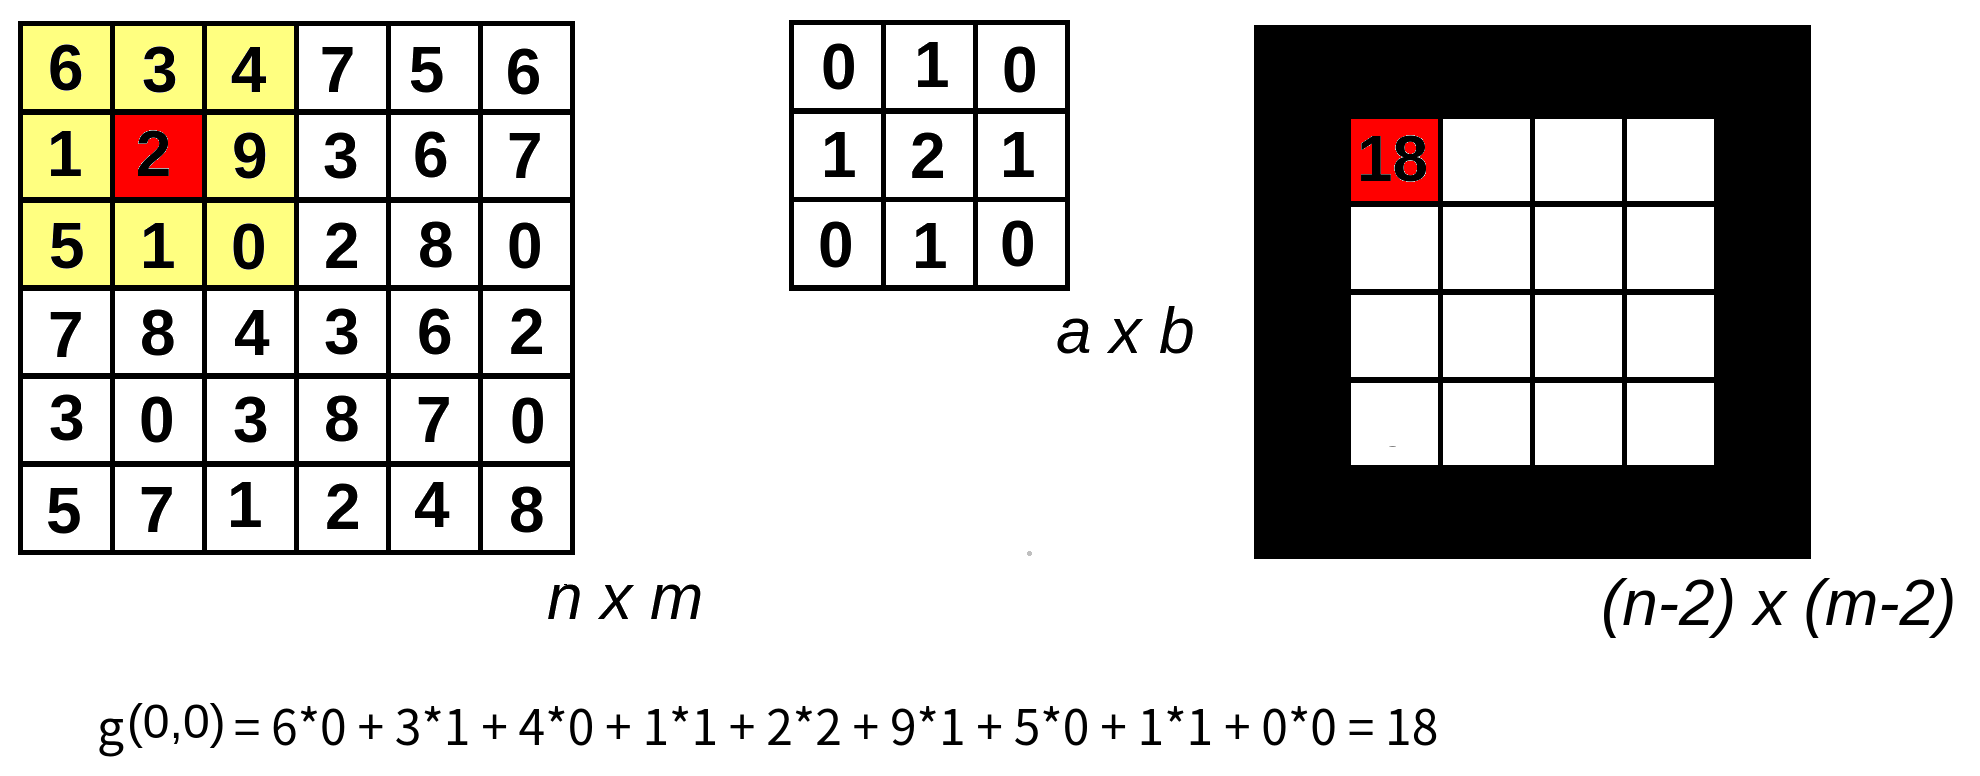

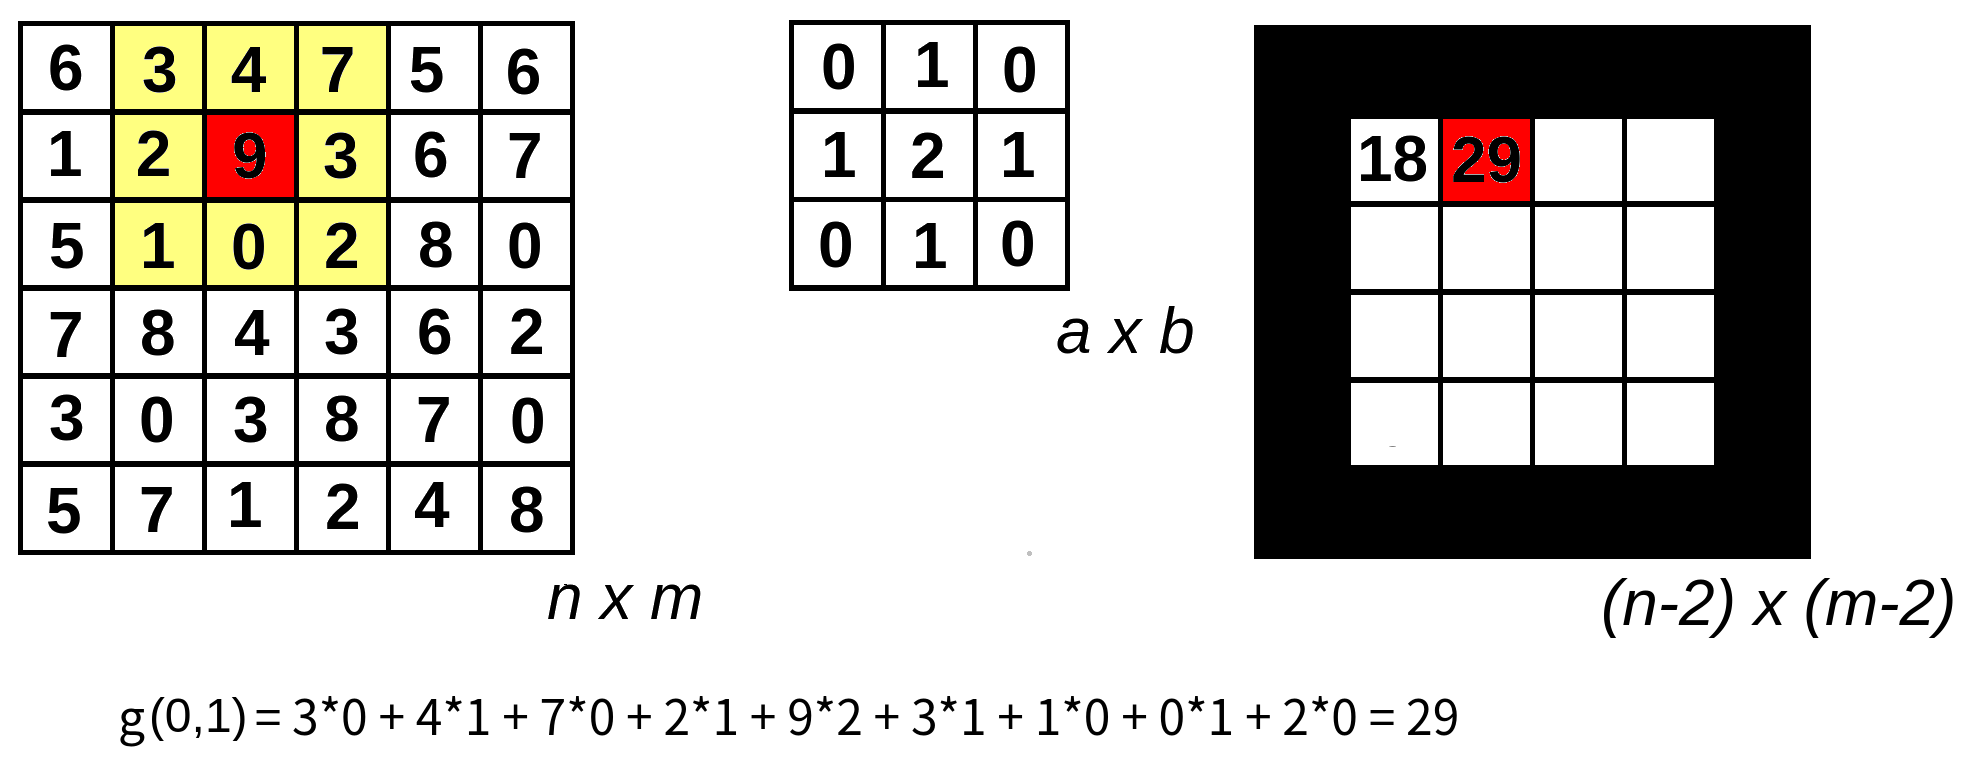

Podemos implementar a operação de convolução para uma imagem com um único canal de cor (imagem em nível de cinzas) como se segue:


In [ ]:
def convolution2D(I,w):

  (n,m) = I.shape
  (a,b) = w.shape

  k = (a-1)//2
  l = (b-1)//2

  output = np.zeros((n-2*k,m-2*l),dtype=float);

  for x in range(k,n-k):
    for y in range(l,m-l):

      s = 0

      for i in range(-k,k+1):
        for j in range(-l,l+1):
      
          s=s+w[i+k,j+l]*I[x+i,y+j]
      
      output[x - k,y - l] = s

  return output

In [ ]:
img = cv2.imread("cicunb.png")

# guarantees the input image to be grayscale:
gray = np.array(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))

g1 = convolution2D(gray,w_laplace)

As imagens a seguir apresentam a imagem original e a imagem de saída após o processo de convolução com o filtro Laplaciano:

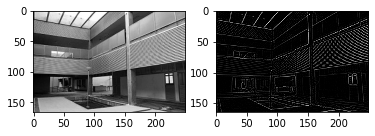

In [ ]:
_, axarr = plt.subplots(1,2)

axarr[0].imshow(gray,cmap='gray', vmin=0, vmax=255)
axarr[1].imshow(g1.astype(np.int32),cmap='gray', vmin=0, vmax=255)

Observe que o processo de convolução gera uma imagem de saída . Isso ocorre devido ao p as dimensões da imagem de saída são menores do que as dimensões da imagem de entrada:

In [ ]:
print("Dimensões da imagem de entrada (original): ")
print(gray.shape)
print("Dimensões da imagem de saída (resultante da convolução): ")
print(g1.shape)

Dimensões da imagem de entrada (original): 
(166, 250)
Dimensões da imagem de saída (resultante da convolução): 
(164, 248)


Vamos agora exemplificar outro exemplo de convolução, mas agora para suavizar uma imagem. Para tal, utiliza-se um filtro Gaussiano:

In [ ]:
w_gauss = 1/25*np.array((
	[0,0, 1, 0,0],
  [0,2, 2, 2,0],
	[1,2, 5, 2,1],
	[0,2, 2, 2,0],
  [0,0, 1, 0,0]), dtype="float")

w_gauss

array([[0.  , 0.  , 0.04, 0.  , 0.  ],
       [0.  , 0.08, 0.08, 0.08, 0.  ],
       [0.04, 0.08, 0.2 , 0.08, 0.04],
       [0.  , 0.08, 0.08, 0.08, 0.  ],
       [0.  , 0.  , 0.04, 0.  , 0.  ]])

Pode-se perceber como a imagem foi "borrada", em que informações de bordas e regiões de mudanças de intensidade foram perdidas.

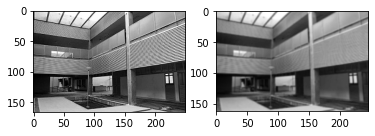

In [ ]:
g2 = convolution2D(gray,w_gauss)

_, axarr = plt.subplots(1,2)

axarr[0].imshow(gray,cmap='gray', vmin=0, vmax=255)
axarr[1].imshow(g2,cmap='gray', vmin=0, vmax=255)

Caso seja importante evitar com que o processo de convolução diminua as dimensões da imagem, pode-se utilizar a técnica de *padding*. Supondo um kernel $w$ de dimensões $a \times b$, devemos criar $a-1$ linhas e $b-1$ colunas

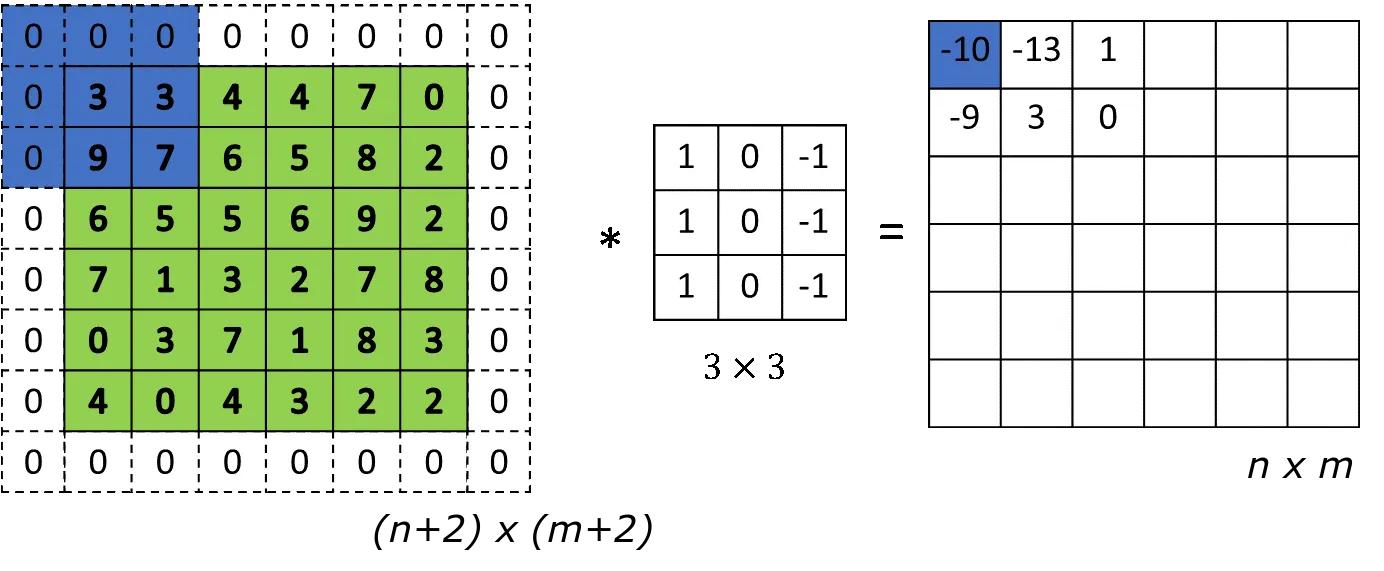

Segue o código-fonte:


In [ ]:
def convolution2D(I,w):

  (n,m) = I.shape
  (a,b) = w.shape

  k = (a-1)//2
  l = (b-1)//2

  output = np.zeros((n-2*k,m-2*l),dtype=float);

  for x in range(k,n-k):
    for y in range(l,m-l):

      s = 0

      for i in range(-k,k+1):
        for j in range(-l,l+1):
      
          s=s+w[i+k,j+l]*I[x+i,y+j]
      
      output[x - k,y - l] = s

  return output.astype(np.int32)

## 11.2. Jargões




*   Kernel: uma estrutura com dimensões menores
*   Stride: pulo da evolução no processo de convolução entre uma imagem e um fitlro. O ideal é utilizarmos stride 1 ou 2 (caso a imagem seja grande). No stride 1, cada pixel da imagem é considerado na convolução, enquanto que no stride 2, o filtro é passado sobre a imagem a cada 2 pixels.


